# TUGAS

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,

* Metode pra pengolahan

* Pemilihan fitur

* Arsitektur ANN

* Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. JELASKAN HASIL YANG ANDA DAPATKAN,

* AKURASI

* CONFUSION MATRIX

* KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

#### **Import MNIST**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Mengimpor dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Menampilkan bentuk data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


* Shape of x_train: Menunjukkan 60.000 data latih dengan setiap gambar berukuran 28x28 piksel.
* Shape of y_train: Menunjukkan 60.000 label untuk data latih.
* Shape of x_test: Menunjukkan 10.000 data uji dengan setiap gambar berukuran 28x28 piksel.
* Shape of x_train: Menunjukkan 10.000 label untuk data uji.

#### **Pra Pengolahan Data**

**Normalisasi**

In [3]:
# Normalisasi data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

* Diubah ke tipe data float32 karena data gambar MNIST berformat integer (0-255). Sehingga, perlu diubah untuk membantu perhitungan lebih akurat & efisien.
* Dibagi 255 karena nilai maks piksel adalah 255.

**Reshaping**

In [4]:
# Mengubah bentuk data
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

Mengubah bentuk data ke vektor, karena ANN membutuhkan data dalam bentuk vektor. Bentuk x_train berubah dari (60000, 28, 28) menjadi (60000, 784). Artinya, setiap gambar direpresentasikan sebagai vektor dengan 784 piksel.

**One-hot Encoding**

In [5]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Dilakukan one-hot encoding agar memastikan bahwa model tidak menganggap ada hubungan antara kelas-kelas, karena setiap kelas direpresentasikan secara independen.

#### **Metode ANN**

**Arsitektur ANN**

In [6]:
# Membuat model ANN
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.2))  # Regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Menampilkan ringkasan model
model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

* Dense Layer Pertama: Menghasilkan 128 neuron dengan jumlah batch tidak ditentukan. Memiliki nilai param 100480 sebagai hasil dari jumlah input (784) dikali jumlah neuron (128) ditambah bias untuk setiap neuron (128).
* Dropout Layer: Bentuk output tetap dan tidak ada parameter yang dilatih.
* Dense Layer Kedua: Memiliki 64 lapisan neuron dengan param merupakan hasil dari 128 * 64 + 64.
* Dense Layer Ketiga (Output Layer): Memiliki 10 neuron dengan nilai param hasil dari 64 * 10 + 10.

**Kompilasi Model**

In [7]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* Digunakan untuk mengatur optimizer dan fungsi loss yang akan digunakan selama proses pelatihan. Setelah dikompilasi, model siap untuk dilatih menggunakan data pelatihan yang telah disiapkan.
* Adam: Menyesuaikan learning rate untuk setiap parameter.
* Loss: Menghitung seberapa baik model memprediksi kelas yang benar dibandingkan dengan kelas yang diprediksi.
* Metrics: Menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama pelatihan dan pengujian.

**Melatih Model**

In [8]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8378 - loss: 0.5302 - val_accuracy: 0.9557 - val_loss: 0.1421
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9525 - loss: 0.1565 - val_accuracy: 0.9669 - val_loss: 0.1134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1150 - val_accuracy: 0.9694 - val_loss: 0.1006
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.0954 - val_accuracy: 0.9719 - val_loss: 0.0965
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0742 - val_accuracy: 0.9722 - val_loss: 0.0970
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0661 - val_accuracy: 0.9727 - val_loss: 0.0916
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0601 - val_accuracy: 0.9740 - val_loss: 0.0899
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9820 - loss: 0.0538 - 

Output menunjukkan bahwa model ANN berhasil dilatih dengan baik. Model menunjukkan peningkatan dalam akurasi dan penurunan nilai loss pada setiap epoch, baik untuk data pelatihan maupun validasi. Ini adalah indikasi bahwa model dapat generalisasi dengan baik pada data yang tidak terlihat.

#### **Evaluasi Model**

**Akurasi**

In [9]:
# Mengevaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0948
Test accuracy: 0.9781000018119812


**Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


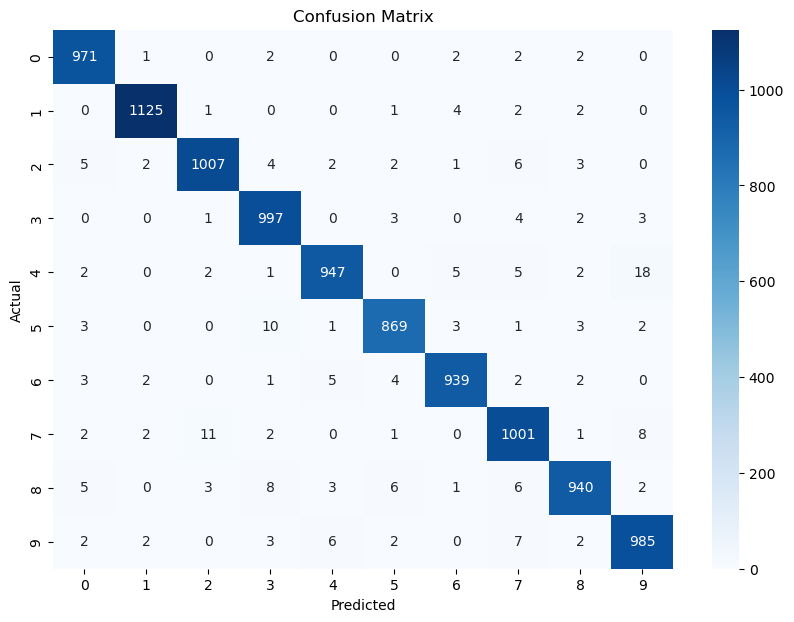

In [10]:
# Prediksi
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()